In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import pprint
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
url="https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
name=['buying','maint','doors','persons','lug_boot','safety','class']
data=pd.read_csv(url,names=name)

In [8]:
a={'vhigh':4, 'high':3, 'med':2, 'low':1}
b={'small':1, 'med':2, 'big':3,'5more':5,'more':5,'2':2,'3':3,'4':4}
c={ 'low':1, 'med':2, 'high':3,'unacc':0, 'acc':1, 'good':2, 'vgood':3}

k=data.replace({'buying':a,'maint':a,'doors':b,'persons':b,'lug_boot':b,'safety':c,'class':c})
k

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0
5,4,4,2,2,2,3,0
6,4,4,2,2,3,1,0
7,4,4,2,2,3,2,0
8,4,4,2,2,3,3,0
9,4,4,2,4,1,1,0


In [9]:
array=k.values
array

array([[4, 4, 2, ..., 1, 1, 0],
       [4, 4, 2, ..., 1, 2, 0],
       [4, 4, 2, ..., 1, 3, 0],
       ..., 
       [1, 1, 5, ..., 3, 1, 0],
       [1, 1, 5, ..., 3, 2, 2],
       [1, 1, 5, ..., 3, 3, 3]])

In [10]:
X=array[:,0:6]#attribute
Y=array[:,6]#class
validation_size=0.30
seed=4
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)


## Support Vector Machines

In [14]:
model = svm.SVC(kernel='linear', gamma=1)
model.fit(X_train,Y_train)
model.score(X_train,Y_train)
predicted= model.predict(X_validation)

In [15]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 3, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 1, 3, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0,

### Single value prediction

In [17]:
a=[[1,1,5,4,3,3]]
f=model.predict(a)
f

array([3])

### confusion matrix,accuracy score,classification report

In [19]:
confusion_matrix = confusion_matrix(Y_validation,predicted)
confusion_matrix

array([[353,   9,   5,   1],
       [ 38,  77,   1,   1],
       [  1,   1,  12,   3],
       [  0,   2,   0,  15]])

In [21]:
accuracy_score=accuracy_score(Y_validation,predicted)
accuracy_score

0.88053949903660889

In [23]:
classification_report=classification_report(Y_validation, predicted)
classification_report

u'             precision    recall  f1-score   support\n\n          0       0.90      0.96      0.93       368\n          1       0.87      0.66      0.75       117\n          2       0.67      0.71      0.69        17\n          3       0.75      0.88      0.81        17\n\navg / total       0.88      0.88      0.88       519\n'

## NAIVE BAYES CLASSIFIER

In [29]:
model = GaussianNB()
model.fit(X_train,Y_train);
ynew = model.predict(X_validation)
ynew

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0, 3, 0, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0,
       1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 3, 0, 0, 2, 0, 0,
       0, 3, 3, 3, 0, 1, 0, 3, 0, 3, 0, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 1,
       3, 0, 0, 1, 0, 0, 3, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 3,
       1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0,
       0, 0,

### Single value prediction

In [32]:
a=[[1,1,5,4,3,3]]
f=model.predict(a)
f

array([3])

### confusion matrix,accuracy score,classification report

In [42]:
confusion_matrix = confusion_matrix(Y_validation, ynew)
confusion_matrix

array([[344,  12,   0,  12],
       [ 29,  34,   5,  49],
       [  1,   2,   5,   9],
       [  0,   0,   0,  17]])

In [43]:
accuracy_score=accuracy_score(Y_validation, ynew)
accuracy_score

0.77071290944123316

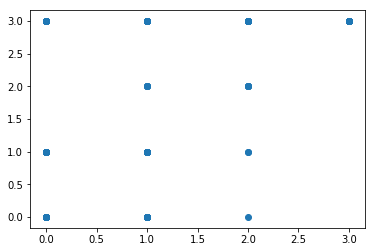

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Y_validation, ynew) #You can also add more variables here to represent color and size.
plt.show()